# Quantitative Biology Lab - Week 1
## Radhika Jangi

## 1. Coverage Analysis

### a. Genome length

>samtools faidx ref.fa<br/>
>cat ref.fa.fai
   
The genome is 233806 bases

### b. Number/length of reads
> fastqc

Open each .fq file in FastQC

frag180.1: 35178 sequences, 100 bp in length<br/>
frag180.2: 35178 sequences, 100 bp in length<br/>
jump2k.1: 70355 sequences, 50 bp in length<br/>
jump2k.2: 70355 sequences, 50 bp in length

### c. Coverage

180.1: (35178*100)/233806 ~ 15X <br/>
180.2: (35178*100)/233806 ~ 15X<br/>
2k.1: (70355*50)/233806 ~ 15X<br/>
2k.2: (70355*50)/233806 ~ 15X

### d. Average Quality Value Plot<br/>
#### 180.1:
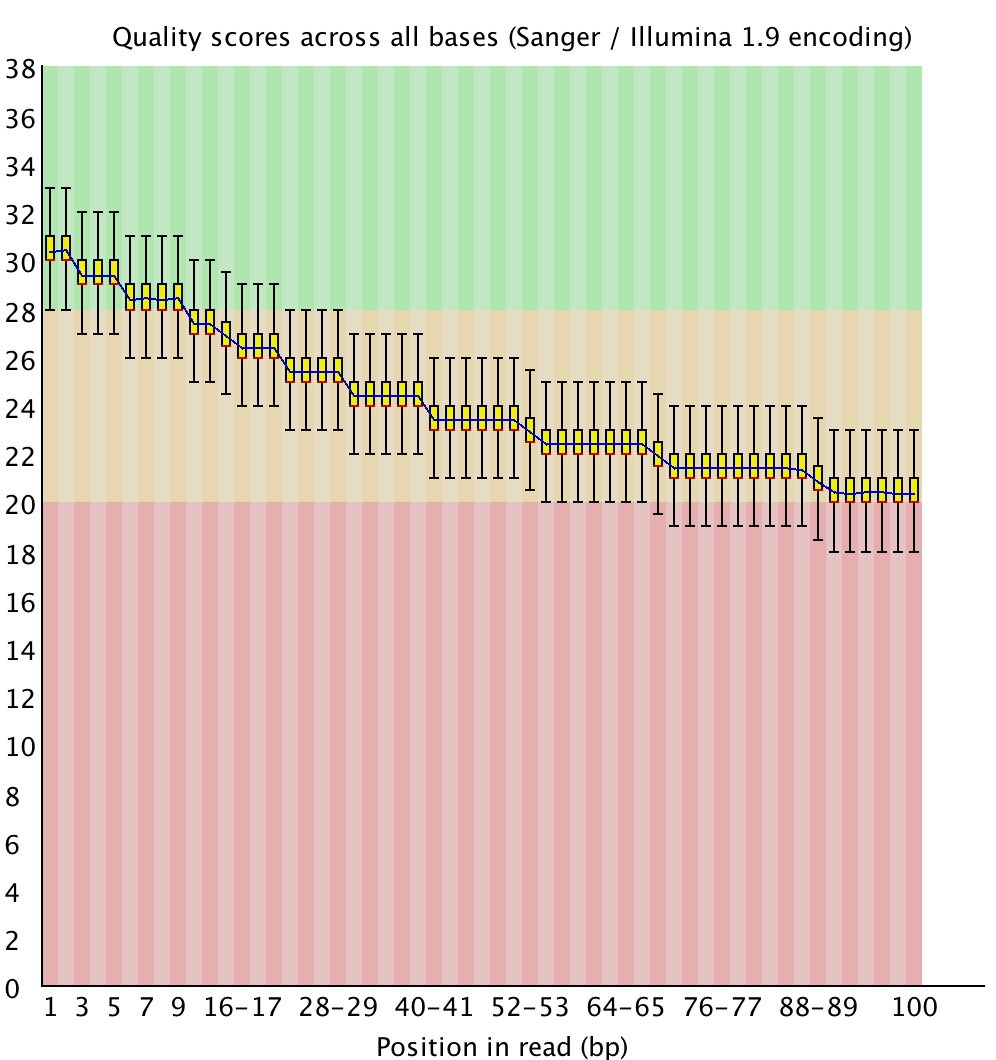
#### 180.2:
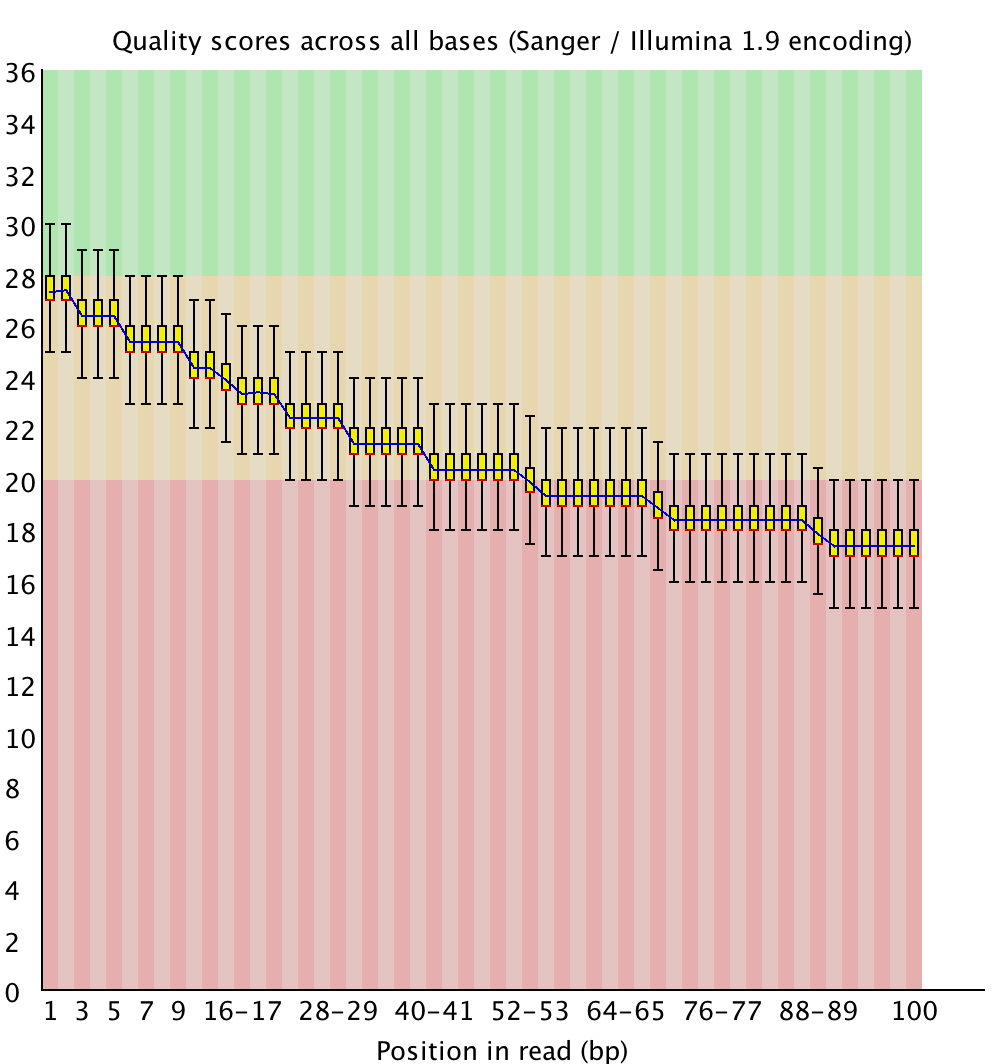
#### 2k.1:
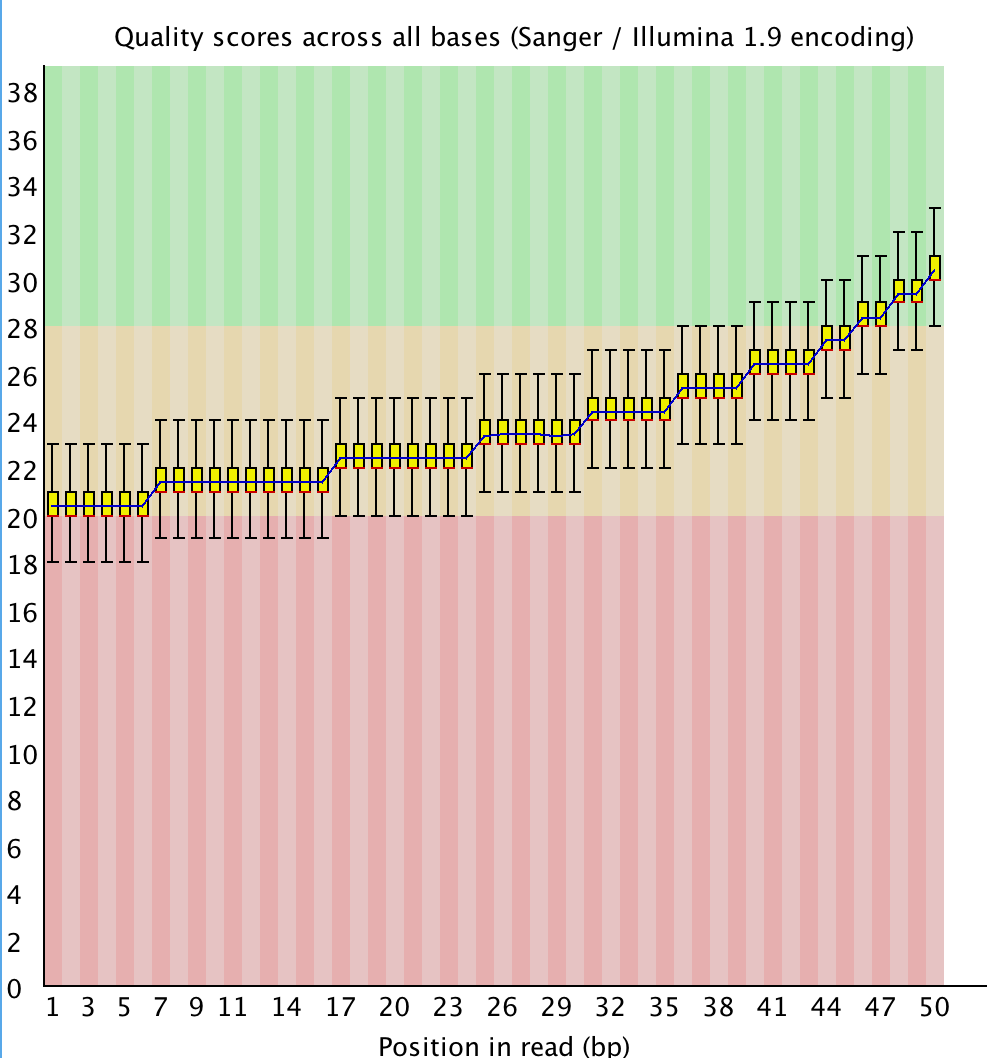
#### 2k.2:
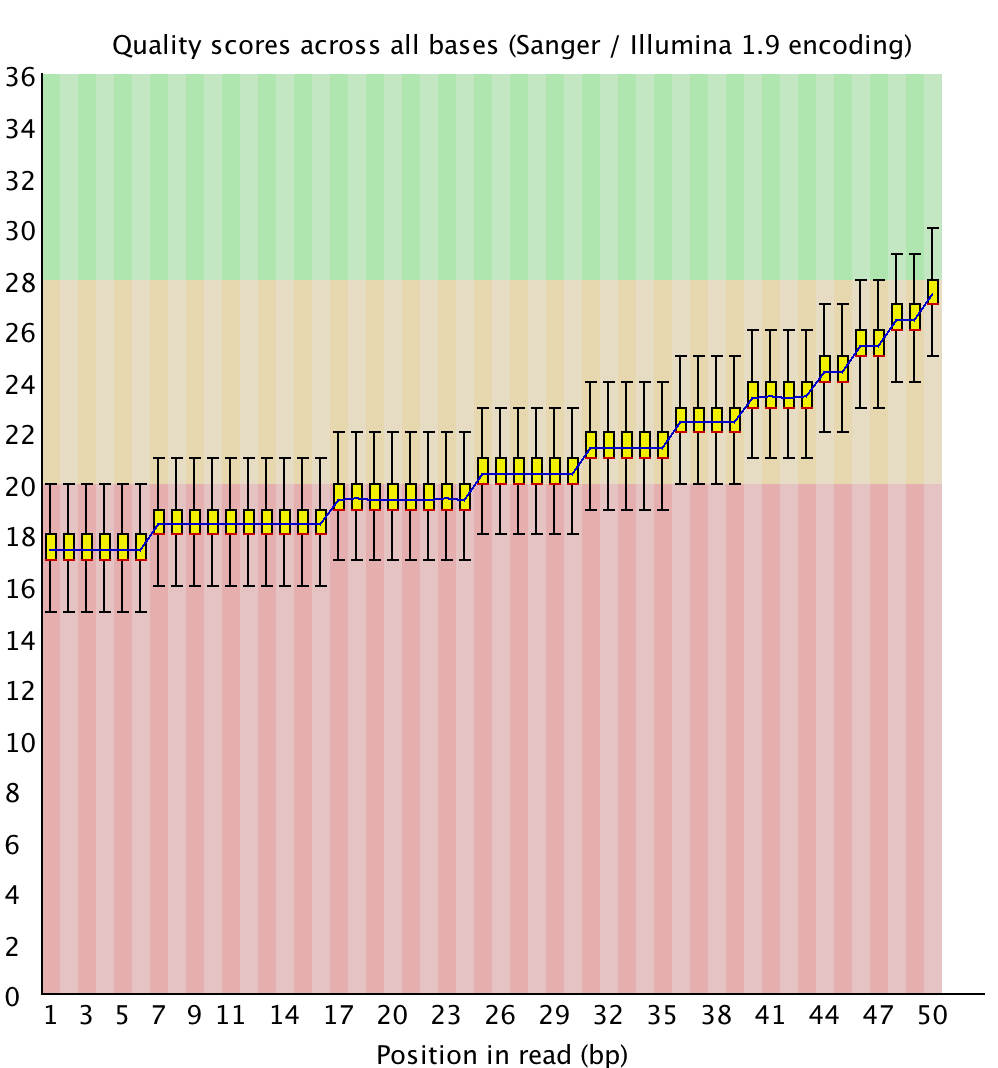

## 2. Kmer Analysis

## 3. De novo Assembly

## 4. Whole Genome Alignment

## 5. Decoding the Insertion